<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Sklearn Pipeline

<hr/>

## Programming

- Chain transformations into a **pipeline** and use a **grid search** for cross validation

> http://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
from time import time

from matplotlib import offsetbox
from sklearn import datasets, decomposition

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

X.shape, y.shape

((1083, 64), (1083,))

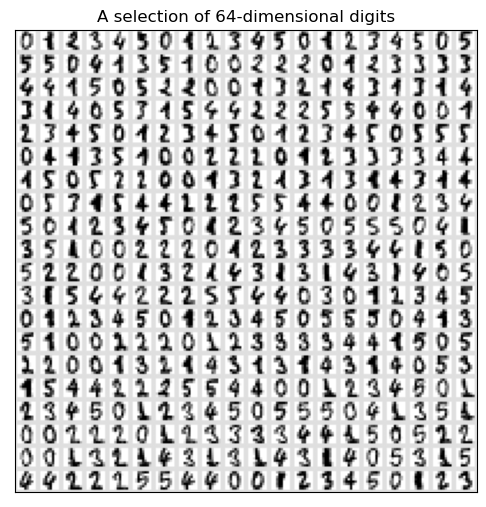

In [4]:
# Plot images of these digits

n_img_per_row = 20
img = 2*np.ones((10 * n_img_per_row, 10 * n_img_per_row)) 
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.figure(figsize=(6,6))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection of 64-dimensional digits');

 Best N: 40
 Best C: 0.01


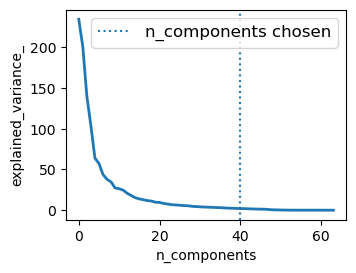

In [5]:
from sklearn import linear_model, decomposition

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Plot the PCA spectrum
pca = decomposition.PCA()
pca.fit(X)

plt.figure(figsize=(4, 3))
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight');
plt.xlabel('n_components');
plt.ylabel('explained_variance_');

# Pipeline
logistic = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 5)

# Parameters of pipelines are set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, logistic__C=Cs))
estimator.fit(X, y)

best = estimator.best_estimator_

print (f' Best N: {best.named_steps["pca"].n_components}')
print (f' Best C: {best.named_steps["logistic"].C}')

plt.axvline(best.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12));